In [23]:
%matplotlib inline
import numpy as np
import poppy
import matplotlib.pyplot as plt
import astropy.units as u
from llowfs import make_coronagraph

In [24]:
import logging
logging.getLogger('poppy').setLevel(logging.WARN)  

# Vortex Coronagraph
## Coronagraph Response

In [25]:
oversample=4
science_pixelscale = 0.005;
llowfs_fov = 0.4; #arcsec
npix_llowfs = 128

llowfs_pixelscale = llowfs_fov/npix_llowfs   #arcsec/pixel

wavelength = 0.632e-6*u.m
sensor_defocus = 7/(2*np.pi) #(waves RMS defocus)
charge=4
lyot_factor=0.80

In [26]:
#wfe = [0, 0, 50e-9, 0, 0]
vtx_onaxis = make_coronagraph([0,0,0,0],wavelength=wavelength,oversample=oversample,pixelscale=science_pixelscale,\
                                llowfs=False,mask_type='vortex',vortex_charge=charge,sensor_defocus=sensor_defocus,lyot_factor=lyot_factor)
vtx_offaxis = make_coronagraph([0,800e-9,0,0],wavelength=wavelength,oversample=oversample,pixelscale=science_pixelscale,\
                                llowfs=False,mask_type='vortex',vortex_charge=charge,sensor_defocus=sensor_defocus,lyot_factor=lyot_factor)
    

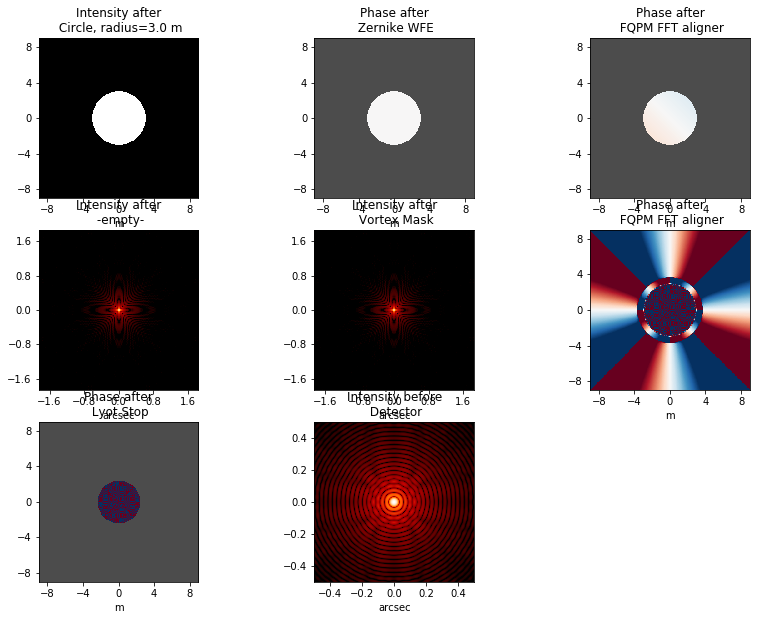

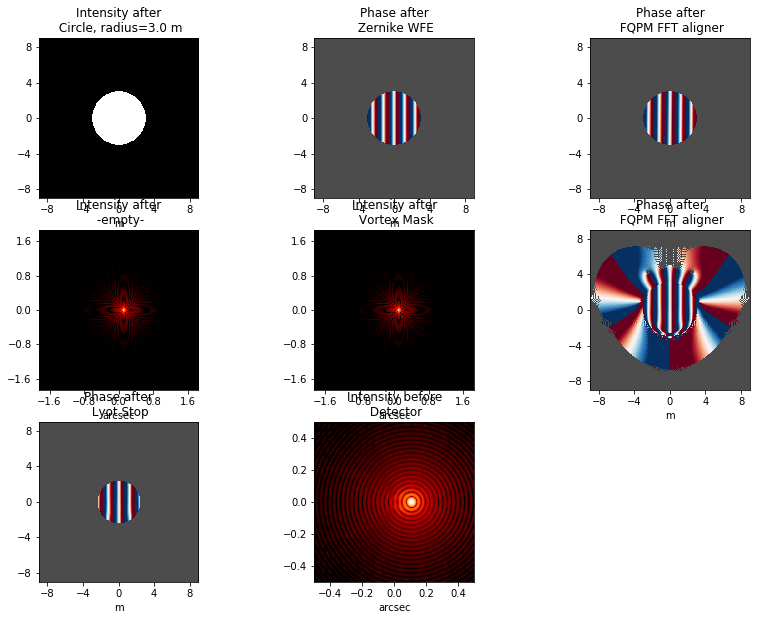

In [27]:
plt.figure(figsize=(14,10))
psf_onaxis = vtx_onaxis.calc_psf(wavelength=wavelength, display_intermediates=True)
plt.figure(figsize=(14,10))
psf_offaxis = vtx_offaxis.calc_psf(wavelength=wavelength, display_intermediates=True)

The total intensity for off-axis case is 3190.040 times the on-axis case.


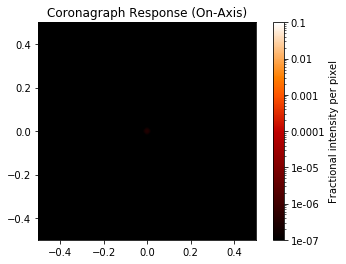

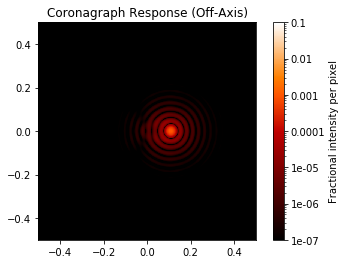

In [28]:
plt.figure()
poppy.display_psf(psf_onaxis,title='Coronagraph Response (On-Axis)')
plt.figure()
poppy.display_psf(psf_offaxis,title='Coronagraph Response (Off-Axis)')

diff = psf_offaxis[0].data.sum()/psf_onaxis[0].data.sum()
print("The total intensity for off-axis case is {0:.3f} times the on-axis case.".format(diff))

## Lyot Low-Order Wavefront Sensor Response

In [29]:

llowfs_flat = make_coronagraph([0,0,0,0],wavelength=wavelength,oversample=oversample,pixelscale=llowfs_pixelscale,\
                                sensor_defocus=sensor_defocus,llowfs=True,mask_type='vortex',vortex_charge=charge,\
                              npix_detector=npix_llowfs)
llowfs_tilt = make_coronagraph([0,10-9,0,0],wavelength=wavelength,oversample=oversample,pixelscale=llowfs_pixelscale,\
                                sensor_defocus=sensor_defocus,llowfs=True,mask_type='vortex',vortex_charge=charge,\
                              npix_detector=npix_llowfs)
llowfs_tip = make_coronagraph([0,0,10e-9,0],wavelength=wavelength,oversample=oversample,pixelscale=llowfs_pixelscale,\
                                sensor_defocus=sensor_defocus,llowfs=True,mask_type='vortex',vortex_charge=charge,\
                             npix_detector=npix_llowfs)
llowfs_defocus = make_coronagraph([0,0,0,10e-9],wavelength=wavelength,oversample=oversample,pixelscale=llowfs_pixelscale,\
                                sensor_defocus=sensor_defocus,llowfs=True,mask_type='vortex',vortex_charge=charge,\
                                 npix_detector=npix_llowfs)
llowfs_defocus2 = make_coronagraph([0,0,0,-10e-9],wavelength=wavelength,oversample=oversample,pixelscale=llowfs_pixelscale,\
                                sensor_defocus=sensor_defocus,llowfs=True,mask_type='vortex',vortex_charge=charge,\
                                 npix_detector=npix_llowfs)
llowfs_spherical = make_coronagraph([0,0,0,0,0,0,0,0,0,0,10e-9],wavelength=wavelength,oversample=oversample,pixelscale=llowfs_pixelscale,\
                                    sensor_defocus=sensor_defocus,llowfs=True,mask_type='vortex',vortex_charge=charge,\
                                    npix_detector=npix_llowfs)
llowfs_spherical2 = make_coronagraph([0,0,0,0,0,0,0,0,0,0,-10e-9],wavelength=wavelength,oversample=oversample,pixelscale=llowfs_pixelscale,\
                                    sensor_defocus=sensor_defocus,llowfs=True,mask_type='vortex',vortex_charge=charge,\
                                    npix_detector=npix_llowfs)


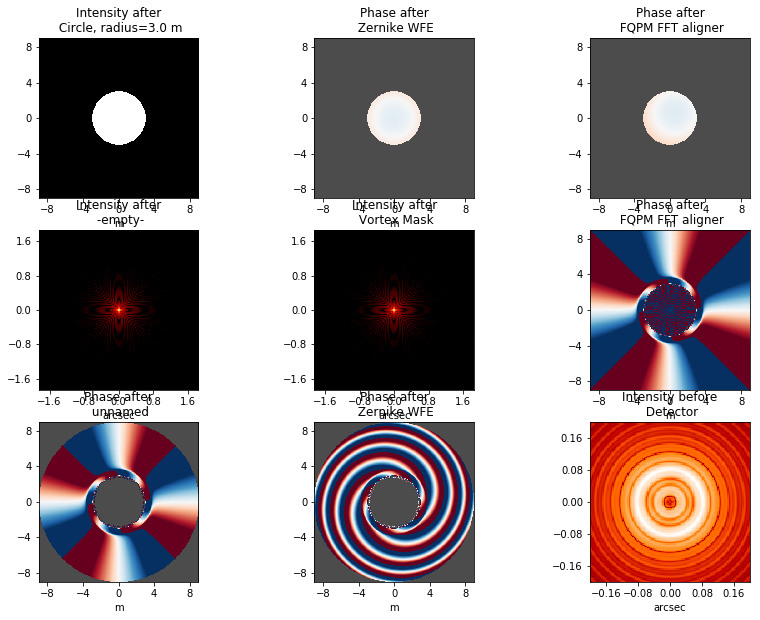

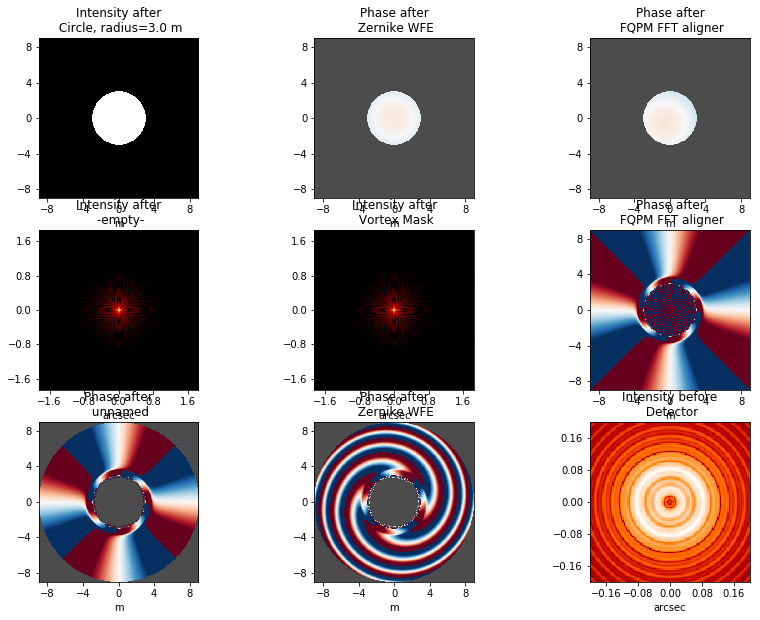

In [30]:
plt.figure(figsize=(14,10))
psf_defocus = llowfs_defocus.calc_psf(wavelength=wavelength, display_intermediates=True)
plt.figure(figsize=(14,10))
psf_defocus2 = llowfs_defocus2.calc_psf(wavelength=wavelength, display_intermediates=True)

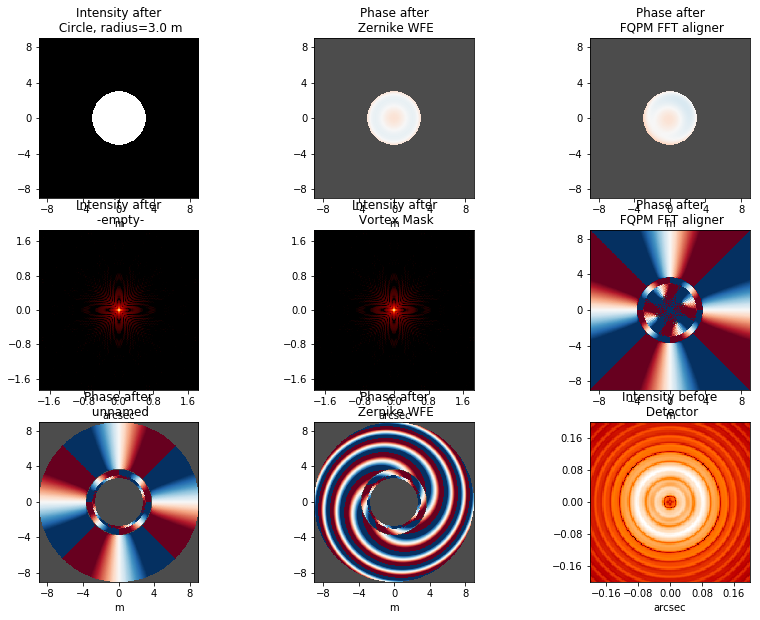

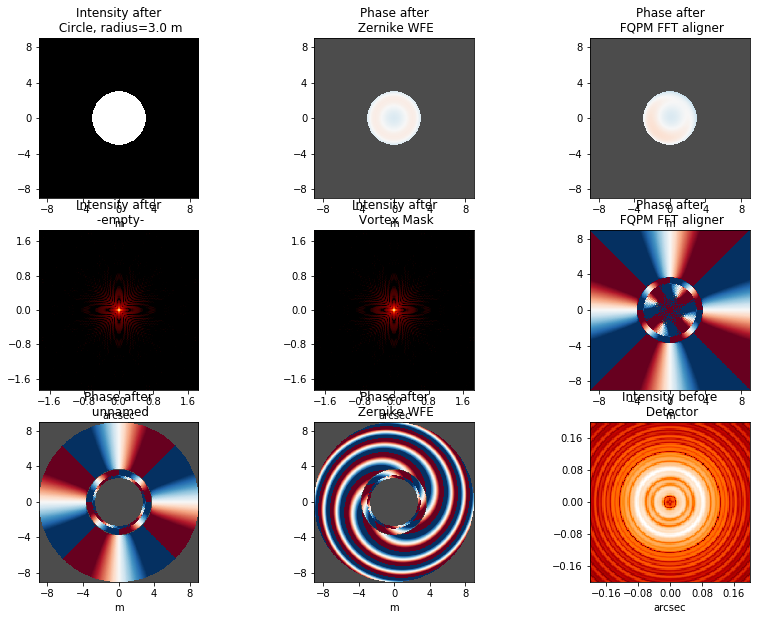

In [31]:
plt.figure(figsize=(14,10))
psf_spherical = llowfs_spherical.calc_psf(wavelength=wavelength, display_intermediates=True)
plt.figure(figsize=(14,10))
psf_spherical2 = llowfs_spherical2.calc_psf(wavelength=wavelength, display_intermediates=True)

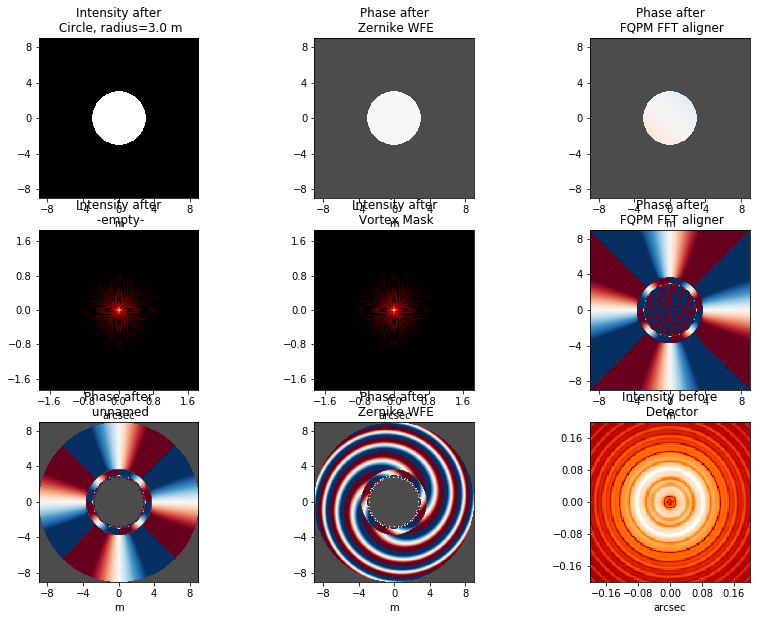

In [32]:
plt.figure(figsize=(14,10))
psf_flat = llowfs_flat.calc_psf(wavelength=wavelength, display_intermediates=True)
psf_tilt = llowfs_tilt.calc_psf(wavelength=wavelength, display_intermediates=False)
psf_tip = llowfs_tip.calc_psf(wavelength=wavelength, display_intermediates=False)



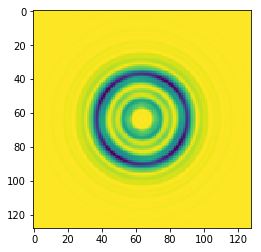

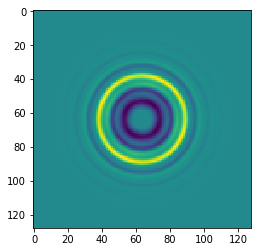

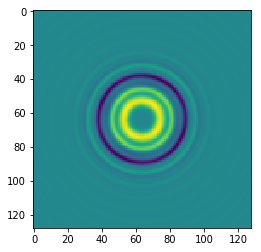

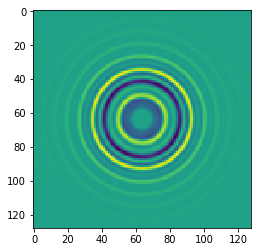

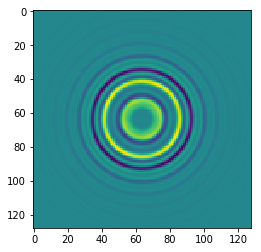

In [33]:
plt.figure()
plt.imshow(psf_tilt[0].data-psf_flat[0].data)
plt.figure()
plt.imshow(psf_defocus[0].data-psf_flat[0].data)
plt.figure()
plt.imshow(psf_defocus2[0].data-psf_flat[0].data)
plt.figure()
plt.imshow(psf_spherical[0].data-psf_flat[0].data)
plt.figure()
plt.imshow(psf_spherical2[0].data-psf_flat[0].data)
#plt.figure()
#plt.imshow(psf_spherical[0].data-psf_defocus[0].data)

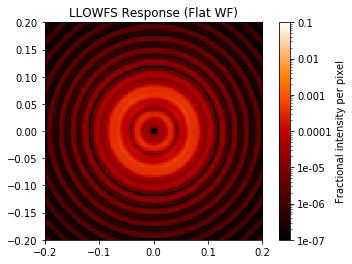

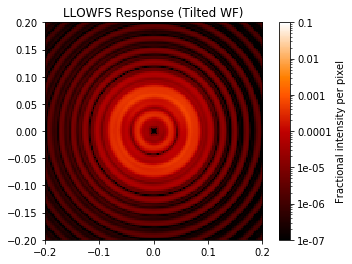

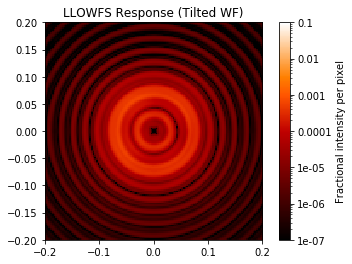

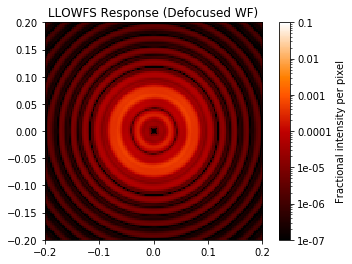

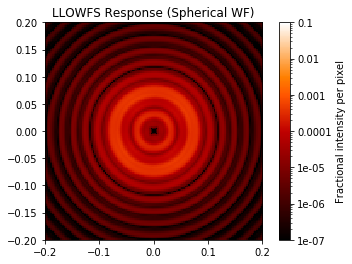

In [12]:
plt.figure()
poppy.display_psf(psf_flat,title='LLOWFS Response (Flat WF)')
plt.figure()
poppy.display_psf(psf_tilt,title='LLOWFS Response (Tilted WF)')
plt.figure()
poppy.display_psf(psf_tip,title='LLOWFS Response (Tilted WF)')
plt.figure()
poppy.display_psf(psf_defocus,title='LLOWFS Response (Defocused WF)')
plt.figure()
poppy.display_psf(psf_spherical,title='LLOWFS Response (Spherical WF)')

In [ ]:
plt.figure()
plt.imshow(psf_flat[0].data,cmap='gray')
plt.figure()
plt.imshow(psf_tilt[0].data-psf_flat[0].data,cmap='gray')
plt.figure()
plt.imshow(psf_defocus[0].data-psf_flat[0].data,cmap='gray')
plt.figure()
plt.imshow(psf_spherical[0].data-psf_flat[0].data,cmap='gray')
plt.figure()
plt.imshow(psf_spherical[0].data-psf_defocus[0].data,cmap='gray')

In [2]:
plt.figure()
poppy.display_psf_difference(psf_flat,psf_tilt,title='PSF Difference (Tilt)')
plt.figure()
poppy.display_psf_difference(psf_flat,psf_tip,title='PSF Difference (Tip)')
plt.figure()
poppy.display_psf_difference(psf_flat,psf_defocus,title='PSF Difference (Defocus)')

NameError: name 'plt' is not defined

# FQPM Coronagraph
## Coronagraph Response

In [72]:
oversample=4

fqpm_onaxis = make_coronagraph([0,0,0,0],wavelength=wavelength,oversample=oversample,pixelscale=science_pixelscale,\
                                llowfs=False,mask_type='fqpm')
fqpm_offaxis = make_coronagraph([0,100e-9,100e-9,0],wavelength=wavelength,oversample=oversample,pixelscale=science_pixelscale,\
                                llowfs=False,mask_type='fqpm')

In [73]:
fqpm_psf_onaxis = fqpm_onaxis.calc_psf(wavelength=wavelength, display_intermediates=False)
fqpm_psf_offaxis = fqpm_offaxis.calc_psf(wavelength=wavelength, display_intermediates=False)

The total intensity for off-axis case is 28.292 times the on-axis case.


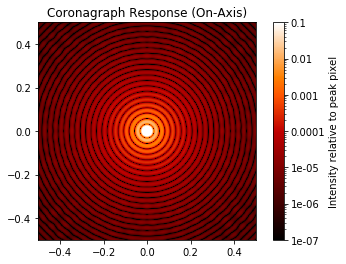

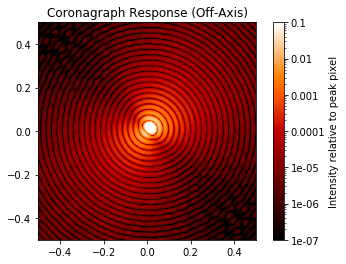

In [74]:
plt.figure()
poppy.display_psf(fqpm_psf_onaxis,normalize='peak',title='Coronagraph Response (On-Axis)')
plt.figure()
poppy.display_psf(fqpm_psf_offaxis,normalize='peak',title='Coronagraph Response (Off-Axis)')

diff = fqpm_psf_offaxis[0].data.sum()/fqpm_psf_onaxis[0].data.sum()
print("The total intensity for off-axis case is {0:.3f} times the on-axis case.".format(diff))

## Lyot Low-Order Wavefront Sensor Response

In [75]:
#sensor_defocus = 4 #(times wavelength)

fqpm_llowfs_flat = make_coronagraph([0,0,0,0],wavelength=wavelength,oversample=oversample,pixelscale=llowfs_pixelscale,\
                                sensor_defocus=sensor_defocus,llowfs=True,mask_type='fqpm',\
                             npix_detector=npix_llowfs)
fqpm_llowfs_tilt = make_coronagraph([0,50e-9,0,0],wavelength=wavelength,oversample=oversample,pixelscale=llowfs_pixelscale,\
                                sensor_defocus=sensor_defocus,llowfs=True,mask_type='fqpm',\
                             npix_detector=npix_llowfs)
fqpm_llowfs_tip = make_coronagraph([0,0,50e-9,0],wavelength=wavelength,oversample=oversample,pixelscale=llowfs_pixelscale,\
                                sensor_defocus=sensor_defocus,llowfs=True,mask_type='fqpm',\
                             npix_detector=npix_llowfs)
fqpm_llowfs_defocus = make_coronagraph([0,0,0,50e-9],wavelength=wavelength,oversample=oversample,pixelscale=llowfs_pixelscale,\
                                sensor_defocus=sensor_defocus,llowfs=True,mask_type='fqpm',\
                             npix_detector=npix_llowfs)
fqpm_llowfs_defocus2 = make_coronagraph([0,0,0,-50e-9],wavelength=wavelength,oversample=oversample,pixelscale=llowfs_pixelscale,\
                                sensor_defocus=sensor_defocus,llowfs=True,mask_type='fqpm',\
                             npix_detector=npix_llowfs)
fqpm_llowfs_spherical = make_coronagraph([0,0,0,0,0,0,0,0,0,0,50e-9],wavelength=wavelength,oversample=oversample,pixelscale=llowfs_pixelscale,\
                                sensor_defocus=sensor_defocus,llowfs=True,mask_type='fqpm',\
                             npix_detector=npix_llowfs)

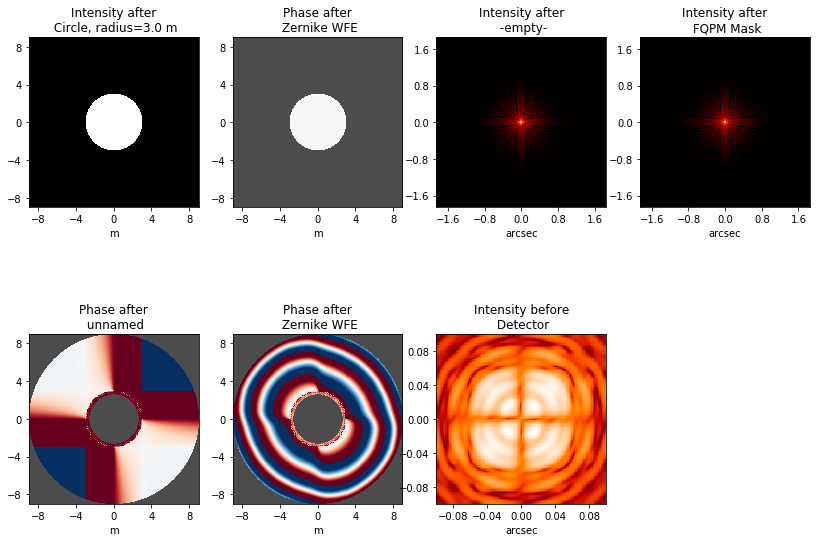

In [76]:
plt.figure(figsize=(14,10))
fqpm_psf_flat = fqpm_llowfs_flat.calc_psf(wavelength=wavelength, display_intermediates=True)

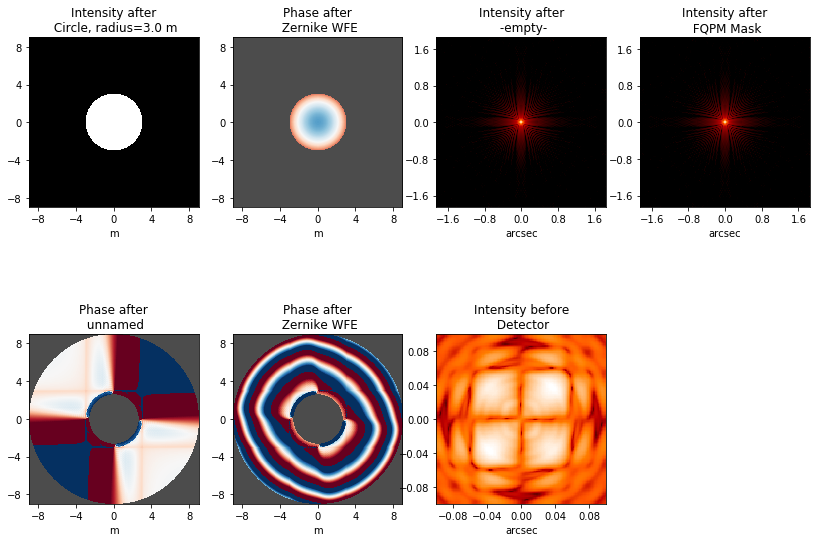

In [77]:
plt.figure(figsize=(14,10))
fqpm_psf_defocus = fqpm_llowfs_defocus.calc_psf(wavelength=wavelength, display_intermediates=True)

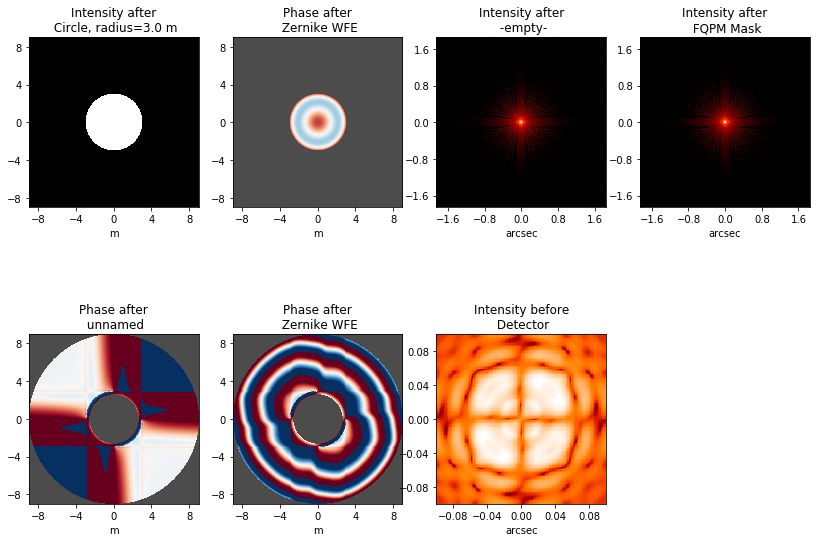

In [78]:
plt.figure(figsize=(14,10))
fqpm_psf_spherical = fqpm_llowfs_spherical.calc_psf(wavelength=wavelength, display_intermediates=True)

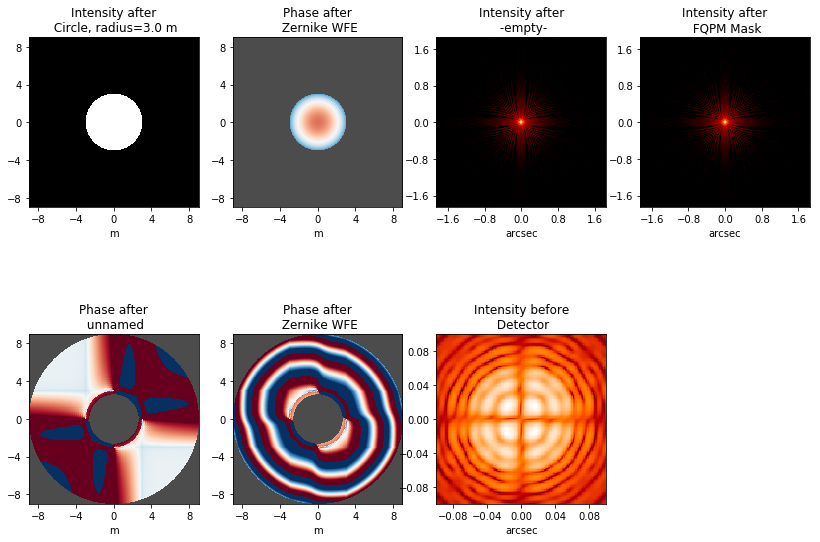

In [79]:
plt.figure(figsize=(14,10))
fqpm_psf_defocus2 = fqpm_llowfs_defocus2.calc_psf(wavelength=wavelength, display_intermediates=True)

In [80]:

fqpm_psf_tilt = fqpm_llowfs_tilt.calc_psf(wavelength=wavelength, display_intermediates=False)
fqpm_psf_tip = fqpm_llowfs_tip.calc_psf(wavelength=wavelength, display_intermediates=False)



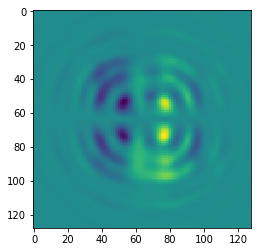

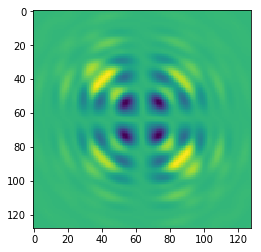

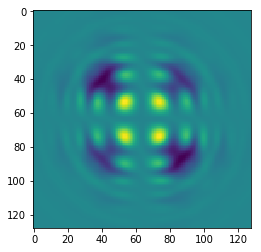

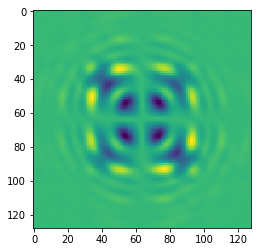

In [81]:
plt.figure()
plt.imshow(fqpm_psf_tilt[0].data-fqpm_psf_flat[0].data)
plt.figure()
plt.imshow(fqpm_psf_defocus[0].data-fqpm_psf_flat[0].data)
plt.figure()
plt.imshow(fqpm_psf_defocus2[0].data-fqpm_psf_flat[0].data)
plt.figure()
plt.imshow(fqpm_psf_spherical[0].data-fqpm_psf_flat[0].data)
#plt.figure()
#plt.imshow(psf_spherical[0].data-fqpm_psf_defocus[0].data)

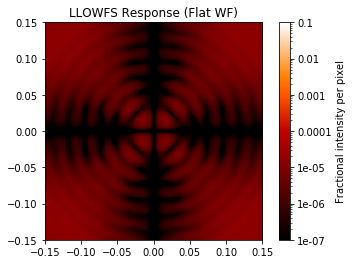

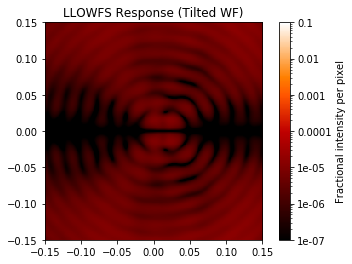

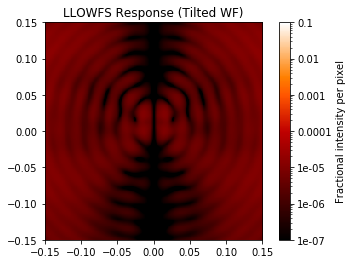

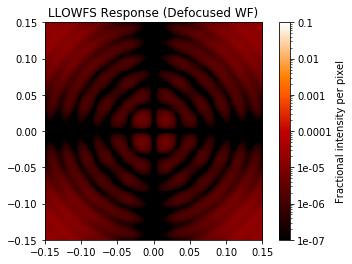

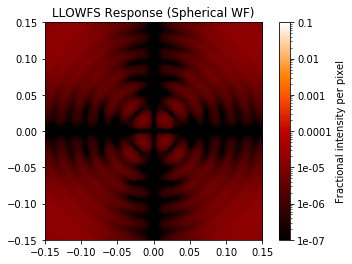

In [12]:
plt.figure()
poppy.display_psf(fqpm_psf_flat,title='LLOWFS Response (Flat WF)')
plt.figure()
poppy.display_psf(fqpm_psf_tilt,title='LLOWFS Response (Tilted WF)')
plt.figure()
poppy.display_psf(fqpm_psf_tip,title='LLOWFS Response (Tilted WF)')
plt.figure()
poppy.display_psf(fqpm_psf_defocus,title='LLOWFS Response (Defocused WF)')
plt.figure()
poppy.display_psf(fqpm_psf_spherical,title='LLOWFS Response (Spherical WF)')

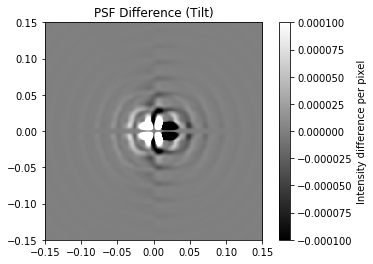

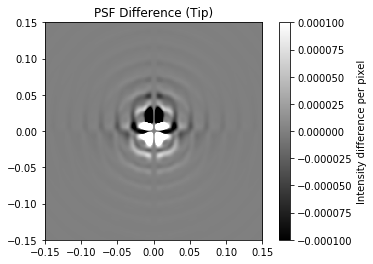

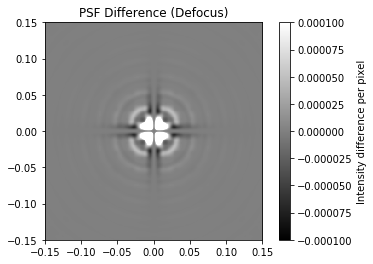

In [18]:
plt.figure()
poppy.display_psf_difference(fqpm_psf_flat,fqpm_psf_tilt,title='PSF Difference (Tilt)')
plt.figure()
poppy.display_psf_difference(fqpm_psf_flat,fqpm_psf_tip,title='PSF Difference (Tip)')
plt.figure()
poppy.display_psf_difference(fqpm_psf_flat,fqpm_psf_defocus,title='PSF Difference (Defocus)')

In [18]:
fqpm_psf_flat[0].data.shape

(512, 512)